In [1]:
# video_id = '745700948'
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
df = pd.read_csv('data/spygea_among.csv')
display(df)

,id,commented_sec,comment,is_emoticon
0,0,1.844,こんばんは！,False
1,1,9.529,spygeaHi spygeaHi,True
2,2,14.034,spygeaHi,True
3,3,20.156,Kita,False
4,4,26.121,きたああああ,False
...,...,...,...,...
47127,47127,46702.801,!uptime,False
47128,47128,46703.094,Stream uptime: 12 hours 58 minutes 33 seconds,False
47129,47129,46704.476,ねみ,False
47130,47130,46704.673,spygeaZz spygeaZz spygeaZz spygeaZz,True


In [3]:
df['commented_min'] = df['commented_sec'] // 60
df['commented_min']  = df['commented_min'] .astype(int)

In [4]:
# コメント末尾が草　or w
df['has_w'] = df['comment'].apply(lambda x : 1if (x[-1] == 'w') or (x[-1] == 'W') or (x[-1] == 'ｗ') or (x[-1] == 'W') or (x[-1] ==  '草') else 0)

In [5]:
# コメント末尾が草　
df['has_kusa'] = df['comment'].apply(lambda x : 1if (x[-1] ==  '草') else 0)

In [6]:
# スタンプ
df['is_emoticon_enc'] = df['is_emoticon'].apply(lambda x : 1 if x else 0)

In [7]:
# スタンプ以外のコメント
df['not_emoticon_enc'] = df['is_emoticon'].apply(lambda x : 0 if x else 1)

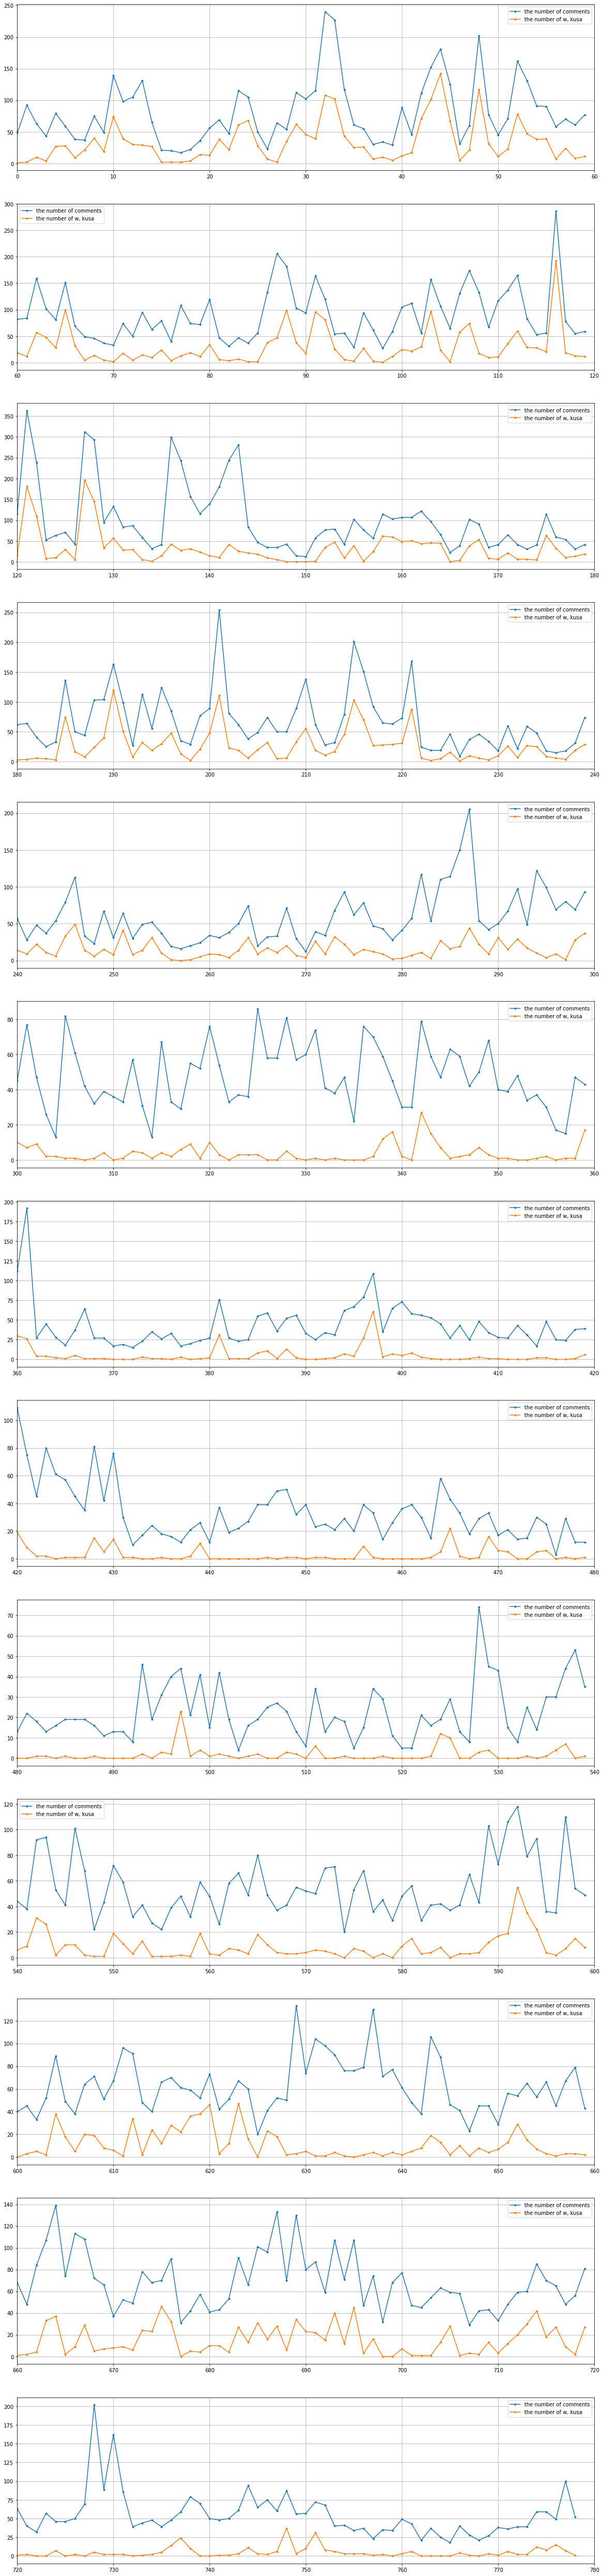

In [8]:
# 最後のコメントが投稿された時間（分）
last_commented_minutes = df.iat[-1, 4]

# グラフの個数は、last_commented_minutesを使い動的に指定。60分ごとにグラフを描画。
graph_number = last_commented_minutes // 60  + 1

# figsizeはgraph_numberを使い動的に指定。グラフ１つあたり(20,7)を割り当てる。
fig, ax = plt.subplots(graph_number, 1, figsize=(20,  graph_number * 7))

for first_index in range(0, last_commented_minutes + 1, 60):
    # x軸の値　コメントが投稿された時間（分刻み）
    x = df.groupby('commented_min').count().iloc[first_index : first_index + 60].index
    
    # 1分間あたりのコメント数のグラフ
    ax[(first_index + 1) // 60].plot(x, df.groupby('commented_min').count().iloc[first_index : first_index + 60].id.values, marker=".", label='the number of comments')
    
    # 1分間あたりの'w'、'草'の数のグラフ
    ax[(first_index + 1) // 60].plot(x, df.groupby('commented_min').sum().iloc[first_index : first_index + 60].has_w.values, marker=".",label='the number of w, kusa')
#      # 1分間あたりの'草'の数のグラフ
#     ax[(first_index + 1) // 60].plot(x, df.groupby('commented_min').sum().iloc[first_index : first_index + 60].has_kusa.values, marker=".",label='the number of kusa')
    
#     # 1分間あたりのスタンプの数のグラフ
#     ax[(first_index + 1) // 60].plot(x, df.groupby('commented_min').sum().iloc[first_index : first_index + 60].is_emoticon_enc.values, marker=".", label='the number of emotes')
#     # 1分間あたりのスタンプ以外のコメント数のグラフ
#     ax[(first_index + 1) // 60].plot(x, df.groupby('commented_min').sum().iloc[first_index : first_index + 60].not_emoticon_enc.values, marker=".", label='the number of text')
    
    ax[(first_index + 1) // 60].grid(axis='both')
    ax[(first_index + 1) // 60].set_xlim(first_index, first_index + 60)
    ax[(first_index + 1) // 60].legend()
plt.show()

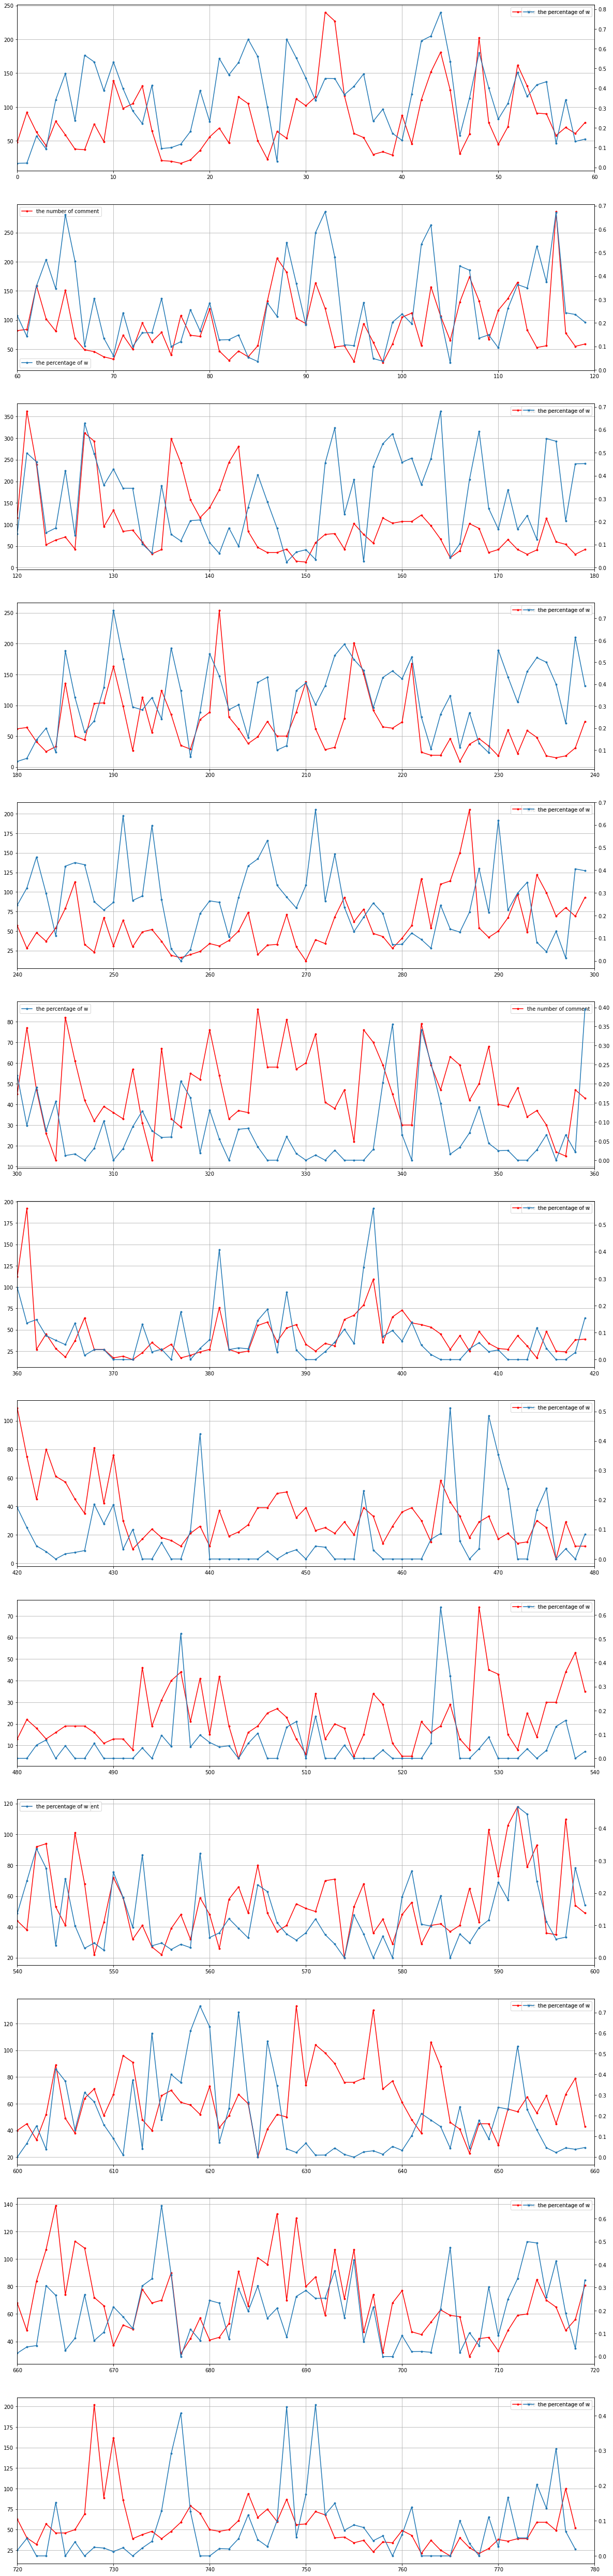

In [32]:
# wの割合とコメント数を表示するグラフ


# 最後のコメントが投稿された時間（分）
last_commented_minutes = df.iat[-1, 4]

# グラフの個数は、last_commented_minutesを使い動的に指定。60分ごとにグラフを描画。
graph_number = last_commented_minutes // 60  + 1

# figsizeはgraph_numberを使い動的に指定。グラフ１つあたり(20,7)を割り当てる。
fig, ax = plt.subplots(graph_number, 1, figsize=(20,  graph_number * 7))

for first_index in range(0, last_commented_minutes + 1, 60):
    # x軸の値　コメントが投稿された時間（分刻み）
    x = df.groupby('commented_min').count().iloc[first_index : first_index + 60].index
    
    comment_count = df.groupby('commented_min').count().iloc[first_index : first_index + 60].id.values # 1分間あたりのコメント数
    w_count = df.groupby('commented_min').sum().iloc[first_index : first_index + 60].has_w.values # 1分間あたりのw、草の数
    
     # 1分間あたりのコメント数のグラフ
    ax[(first_index + 1) // 60].plot(x, comment_count, marker=".",label='the number of comment', c='r')
    
    # 1分間あたりの'w'、'草'の数のグラフz
    ax2 = ax[(first_index + 1) // 60].twinx()
    ax2.plot(x, w_count / comment_count, marker=".",label='the percentage of w')

    ax[(first_index + 1) // 60].grid(axis='both')
    ax[(first_index + 1) // 60].set_xlim(first_index, first_index + 60)
    ax[(first_index + 1) // 60].legend()
    ax2.legend()
plt.show()

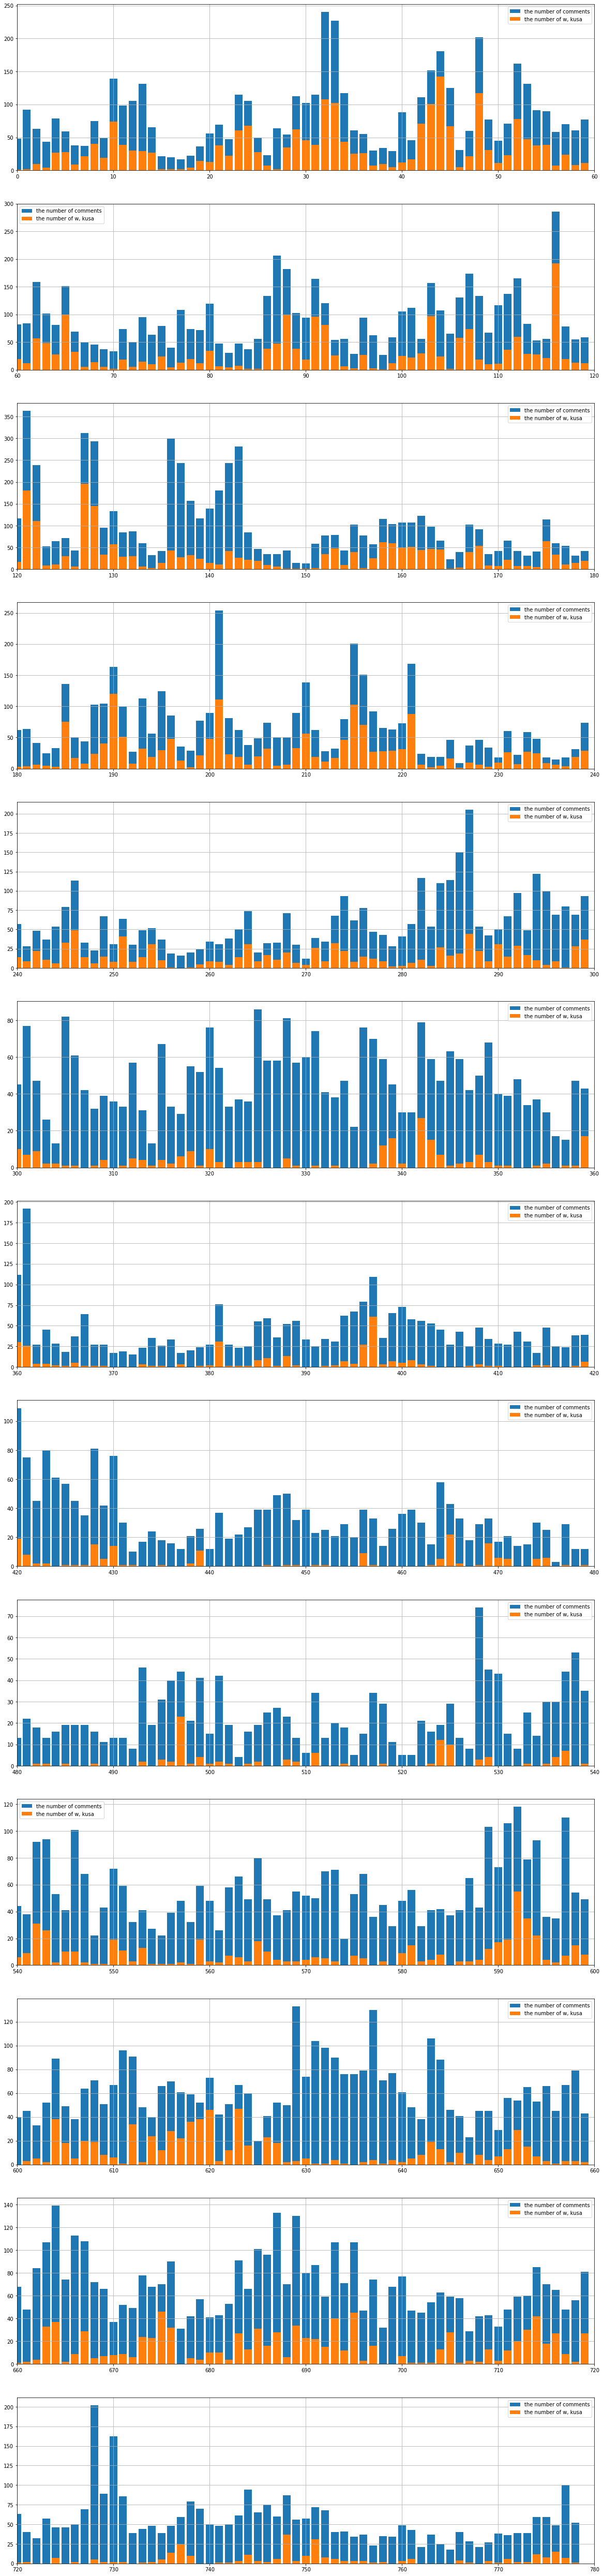

In [35]:
# コメント数とw数の棒グラフ

# 最後のコメントが投稿された時間（分）
last_commented_minutes = df.iat[-1, 4]

# グラフの個数は、last_commented_minutesを使い動的に指定。60分ごとにグラフを描画。
graph_number = last_commented_minutes // 60  + 1

# figsizeはgraph_numberを使い動的に指定。グラフ１つあたり(20,7)を割り当てる。
fig, ax = plt.subplots(graph_number, 1, figsize=(20,  graph_number * 7))

for first_index in range(0, last_commented_minutes + 1, 60):
    # x軸の値　コメントが投稿された時間（分刻み）
    x = df.groupby('commented_min').count().iloc[first_index : first_index + 60].index
    
    # 1分間あたりのコメント数のグラフ
    ax[(first_index + 1) // 60].bar(x, df.groupby('commented_min').count().iloc[first_index : first_index + 60].id.values, label='the number of comments')
    
    # 1分間あたりの'w'、'草'の数のグラフ
    ax[(first_index + 1) // 60].bar(x, df.groupby('commented_min').sum().iloc[first_index : first_index + 60].has_w.values, label='the number of w, kusa')
  
    ax[(first_index + 1) // 60].grid(axis='both')
    ax[(first_index + 1) // 60].set_xlim(first_index, first_index + 60)
    ax[(first_index + 1) // 60].legend()
plt.show()